In [2]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib import pylab as plt
import root_numpy
import pandas as pd
import numpy
import seaborn
%matplotlib inline
#%matplotlib notebook

In [6]:
step=10000
etalon_plates = []
for p in range(48, 57):
    backtracks = root_numpy.root2array("129294.{p}.1.1000.cp.root".format(p=p), 
                                   treename="couples", 
                                   branches=["s.eX", "s.eY", "s.eZ",
                                            "s.eTX", "s.eTY",
                                            "s.eChi2"], step=step)
    etalon_plates.append(backtracks)

In [23]:
m = 1e9
for t in etalon_plates:
    for p in t:
        m = min(m, p[0])
m

28758.669921875

In [3]:
c = numpy.array(etalon_plates)
c.shape

(9,)

In [17]:
def load_bg(step=10000):
    # ignore 57th layer since it looks different
    etalon_plates = []
    for p in range(48, 57):
        backtracks = root_numpy.root2array("129294.{p}.1.1000.cp.root".format(p=p), 
                                       treename="couples", 
                                       branches=["s.eX", "s.eY", "s.eZ",
                                                "s.eTX", "s.eTY",
                                                "s.eChi2"], step=step)
        etalon_plates.append(backtracks)
        
    df = None
    for p in range(58):
        plate = numpy.copy(etalon_plates[p % len(etalon_plates)])
        #print(type(plate))
        plate['s.eZ'] = p * 1293
        # plt.hist(backtracks['s.eY'], bins=100, histtype='step', label="%d"%p)
        if df is None:
            df = pd.DataFrame(plate)
            # print ">", df.shape
        else:
            df = pd.concat([df, pd.DataFrame(plate)], ignore_index=True)
    # plt.legend()
    df['plate_index'] = df['s.eZ'].astype('category').cat.codes + 1
    print ("bg: {n} tracks".format(n=df.shape[0]))
    return df

In [18]:
#df = load_bg()
#df['s.eTX'].min()
#plt.hist(df['s.eTY'], bins=50, lw=3, normed=True)
#df

bg: 2767 tracks


In [24]:
#_ = plt.hist(c[1]['s.eZ'], bins=100, histtype='step', lw=3)
#_ = plt.hist(backtracks['s.eY'], bins=100, histtype='step', lw=3)
#_ = plt.hist(backtracks['s.eZ'], bins=100, histtype='step', lw=3)

In [63]:
def plot_bg_quiver(step, df):
    backtracks = df
    x, y, z = backtracks['s.eX'][::step], backtracks['s.eY'][::step], backtracks['s.eZ'][::step]
    tx, ty = backtracks['s.eTX'][::step], backtracks['s.eTY'][::step]
    dZ = 204
    U = tx * dZ
    V = ty * dZ
    W = dZ
    length = numpy.sqrt(U**2 + V**2 + W**2)
    fig = plt.figure(figsize=(12,8))
    ax = fig.gca(projection='3d')
    ax.view_init(azim=-74, elev=19)
    # change order to make display similar to OPERA
    C = plt.cm.jet(numpy.repeat(numpy.linspace(0,1, num=len(x)),1))
    for i in range(len(z)):
        #print ("line: ", i, z[i], x[i], y[i], W, U[i], V[i])
        plt.quiver(z[i], x[i], y[i], 
                   W, U[i], V[i], 
                   arrow_length_ratio=0,
                   length=length[i],
                   pivot='tail',
                   colors=C)
    ax.set_xlabel("z")
    ax.set_ylabel("x")
    ax.set_zlabel("y")
    ax.set_xlim(left=-dZ, right=max(df['s.eZ'])+dZ)
    #print ("len(slopes): {slopes}".format(slopes=len(U)))
    #print (tx, ty, U, V, W)

In [50]:
#load_bg()

bg: 2767 tracks


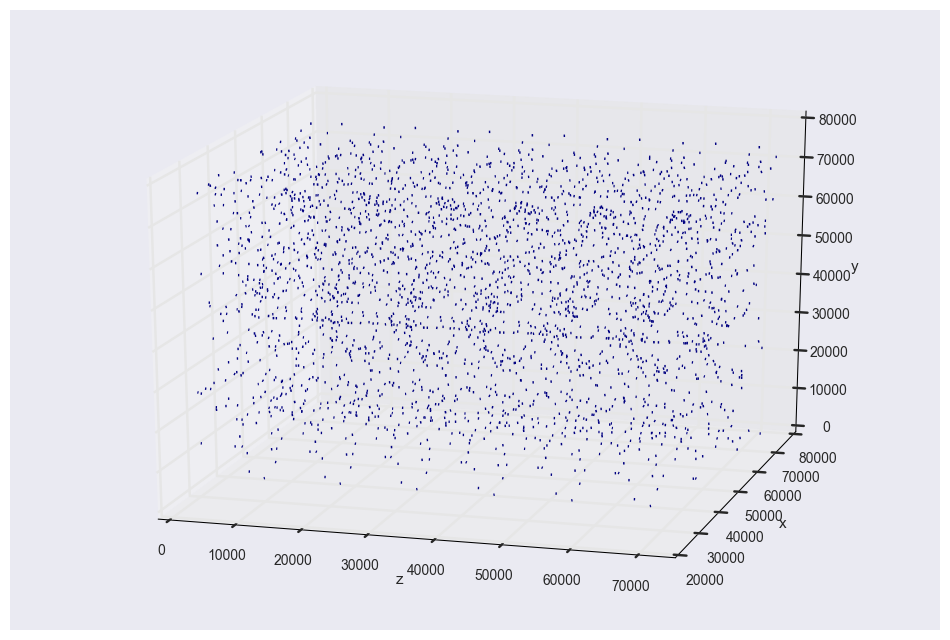

In [66]:
# plot_bg_quiver(1, load_bg())

In [112]:
def plot_bg(df, step=1):
    dZ = 205
    # mind the order!
    d0 = pd.DataFrame([
                df['s.eZ'][::step],
                df['s.eX'][::step],
                df['s.eY'][::step]],
                index=['z', 'x', 'y']).T
    numtracks = d0.shape[0]
    dd = pd.DataFrame([
            df['s.eTX'][::step]*dZ,
            df['s.eTY'][::step]*dZ],
            index=['x', 'y']).T
    dd.insert(loc=0, column='z', value=dZ)
    d1 = d0 + dd
    # print d0, d1
    C = plt.cm.Blues(0.5)
    lc = Line3DCollection(list(zip(d0.values, d1.values)), colors=C, alpha=0.5, lw=2)

    fig = plt.figure(figsize=(12,8))
    ax = fig.gca(projection='3d')
    #fig, ax = plt.subplots(1,1)
    ax.view_init(azim=-84, elev=10)
    ax.add_collection3d(lc)
    
    # mind the order!
    ax.set_xlabel("z")
    ax.set_ylabel("x")
    ax.set_zlabel("y")  
    ax.set_xlim(d0['z'].min(), d0['z'].max())
    ax.set_ylim(d0['x'].min(), d0['x'].max())
    ax.set_zlim(d0['y'].min(), d0['y'].max())
    print ("len(slopes): {slopes}".format(slopes=numtracks))

bg: 2767 tracks
len(slopes): 2767


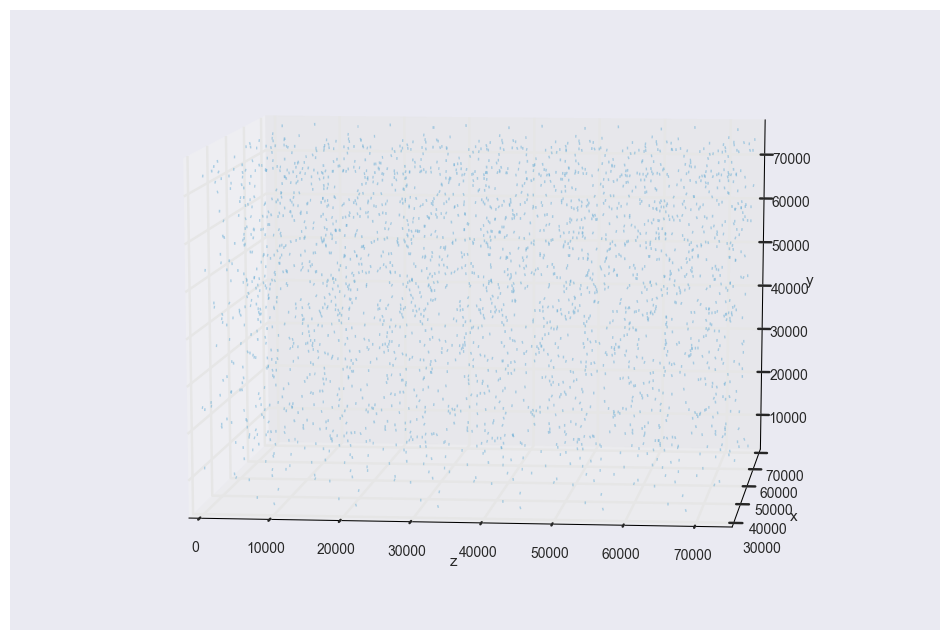

In [113]:
# df = load_bg(step=10000)
# plot_bg(df, step=1)